Any discrete signal could be to combine thought:

#### Sum:
$$y[n]=x_1[n]+x_2[n]$$

For example, signal and noise

#### Scaling:
$$y[n]=a \cdot x[n]$$

For example, amplification and attenuation.

#### Delay:
$$y[n]=x[n - D]$$

This is key for FIR filters

### Convolution:

In a DSP system, filter = convolving the input signal with the filter's impulse response.

$$y[n] = (x * h)[n] = \sum _{k=0} ^{M-1} { h[k]x[n-k]}$$

* $x[n]$: input signal.
* $h[k]$: filter coefficients.
* $y[n]$: output filtered.

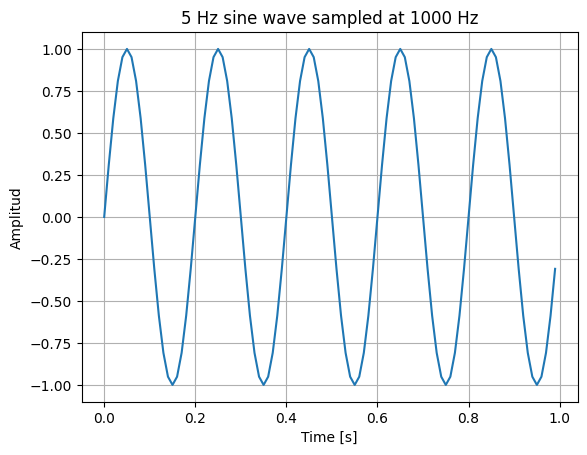

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# params

fs = 100   # sampling frecuency
T = 1.0     # time
f0 = 5      # angular frecuency

t = np.arange(0, T, 1/fs)   # time vector
x = np.sin(2 * np.pi * f0 * t)

plt.figure()
plt.plot(t, x)
plt.xlabel("Time [s]")
plt.ylabel("Amplitud")
plt.title("5 Hz sine wave sampled at 1000 Hz")
plt.grid(True)
plt.show()

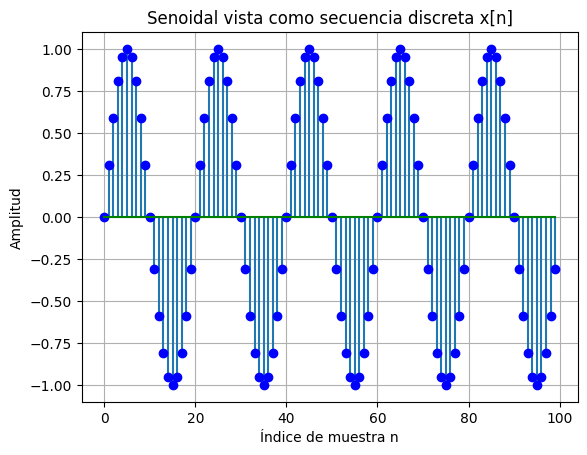

In [11]:
n = np.arange(len(x))

plt.figure()
plt.stem(n, x, markerfmt='bo', basefmt='g-')
plt.xlabel("Índice de muestra n")
plt.ylabel("Amplitud")
plt.title("Senoidal vista como secuencia discreta x[n]")
plt.grid(True)
plt.show()